Start by importing the required packages: 
Pandas, Seaborn, Matplotlib, and Numpy

In [106]:
import pandas as pd

In [107]:
import seaborn as sns

In [108]:
import matplotlib.pyplot as plt

In [109]:
import numpy as np

Import the Sales data through the local file method

In [110]:
df = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\MBAN 6110\sales_data.csv")

Get an overview of the data by looking at the different columns, their data types, and their descriptive statistics

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [112]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


Taking a look at the first 10 and last 10 records in the data to understand how it is structured

In [113]:
df.head(10)

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
7,Product_18,Region_7,19.27,9.0,2022-01-08
8,Product_16,Region_9,30.70,14.0,2022-01-09
9,Product_9,Region_2,264.05,7.0,2022-01-10


In [114]:
df.tail(10)

,Product,Region,Price,Units Sold,Sale Date
1040,Product_44,Region_9,101.69,NaN,2024-09-11
1041,Product_30,Region_3,8.76,13.0,2024-06-23
1042,Product_6,Region_9,14.36,16.0,2024-08-13
1043,Product_20,Region_6,58.50,9.0,2022-10-06
1044,Product_48,Region_10,23.57,6.0,2024-02-28
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27
1049,Product_16,Region_2,69.30,8.0,2024-02-23


Drop the duplicate values in the data as to not provide one area with extra values that could scue the data

In [115]:
df.drop_duplicates(inplace=True)

Reordering the data from oldest sale date to newest 

In [116]:
df.sort_values(by='Sale Date', ascending=True)

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
996,Product_36,NaN,46.19,9.0,2024-09-23
997,NaN,Region_7,311.80,13.0,2024-09-24
998,Product_2,Region_10,43.44,15.0,2024-09-25


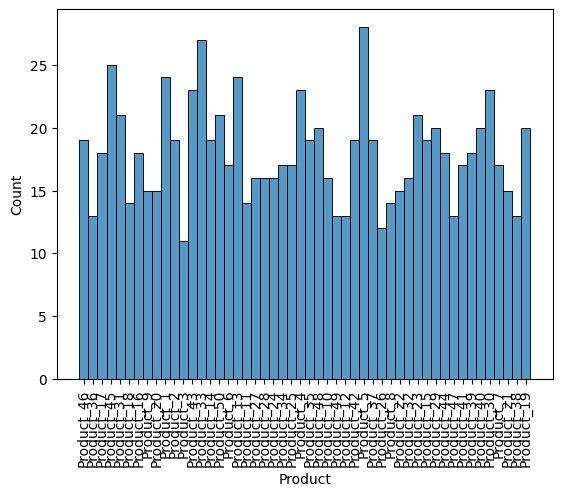

In [117]:
sns.histplot(df['Product'])
plt.xticks(rotation = 90)
plt.show()

The above graph shows that the occurence of each product sold is fairly consistent across each product excluding other which is not an issue

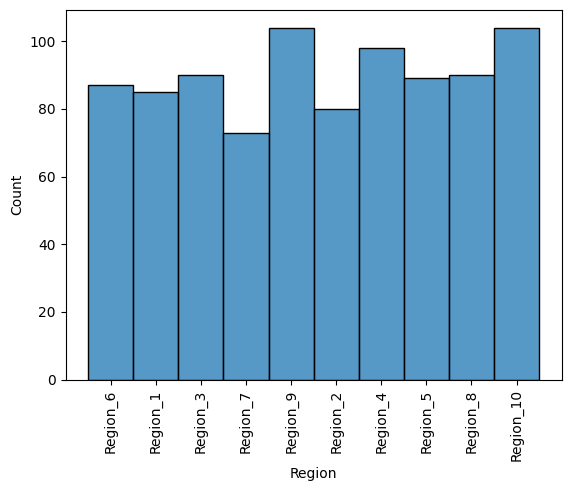

In [118]:
sns.histplot(df['Region'])
plt.xticks(rotation = 90)
plt.show()

This shows us that the occurence of each region is consistent across each telling us there is probably no issue here

<Axes: xlabel='Price', ylabel='Count'>

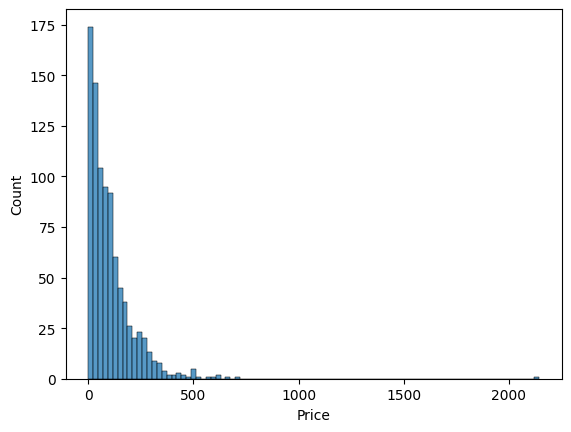

In [119]:
sns.histplot(df['Price'])

When looking at this graph it is positively scewed but more importantly there is an outlier in the data that must be removed

Below we determine the index of the outlier

In [120]:
df[df['Price'] > 1000]

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


Removing the outlier

In [121]:
df.drop(969, axis = 0, inplace = True)

Checking the graph again to ensure the outlier was removed

<Axes: xlabel='Price', ylabel='Count'>

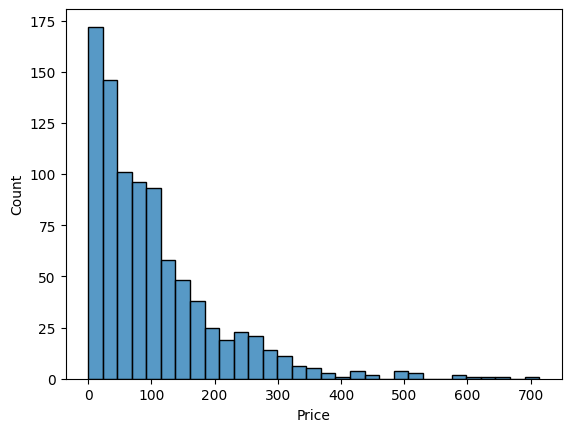

In [122]:
sns.histplot(df['Price'])

<Axes: xlabel='Units Sold', ylabel='Count'>

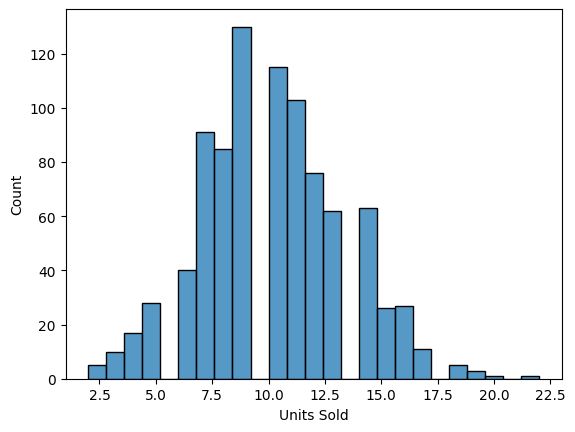

In [123]:
sns.histplot(df['Units Sold'])

This graph tells us the frequency of the amount of items sold, this seems to be normally distributed but has bins with no values in them. With this I just assume the company does not sell bundles in that specific amount of items. There appear to be no clear outliers.

<Axes: >

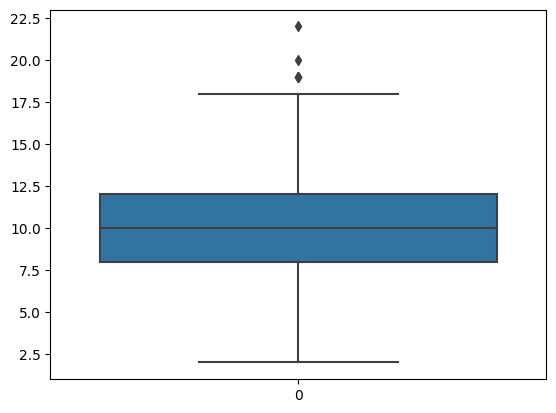

In [124]:
sns.boxplot(df['Units Sold'])

Using a boxplot just as a double check to ensure there are no clear outliers

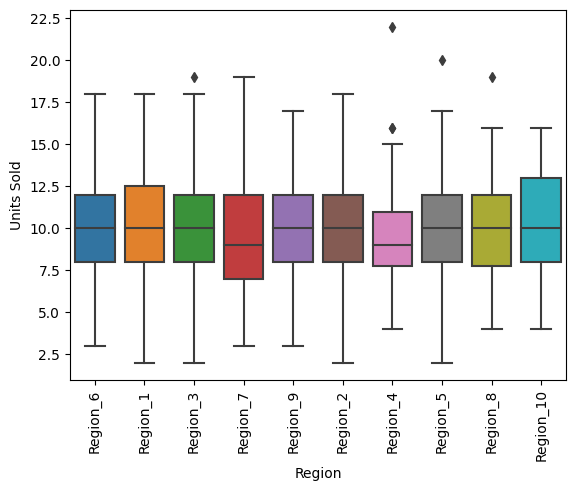

In [125]:
sns.boxplot(data = df, x = 'Region', y = 'Units Sold') 
plt.xticks(rotation = 90)
plt.show()

Using the boxplot to see if there is an outlier in the amount of units sold in each region. There are some values that the boxplot considers outliers but nothing is so far away from the IQR that it is concering so I will not remove any values.

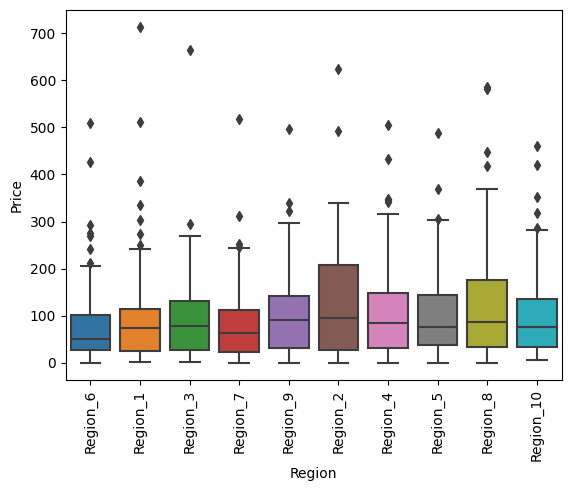

In [126]:
sns.boxplot(data = df, x = 'Region', y = 'Price')
plt.xticks(rotation = 90)
plt.show()

Looking at the price breakdown for each of the regions. Despite there being a lot of very high values for some of the regions I don't think these are necessary to remove. The first reason is because all regions have high values and the second reason is one value is not so far away from the others and out on its own. For these reasons I will keep the all of this data for my analysis.

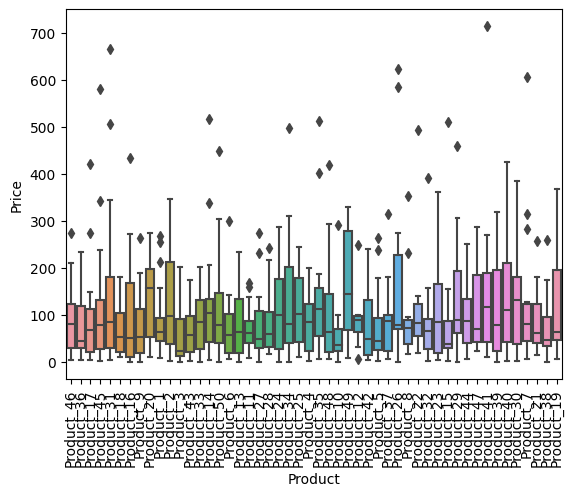

In [127]:
sns.boxplot(data = df, x = 'Product', y = 'Price')
plt.xticks(rotation = 90)
plt.show()

I then looked at the price breakdown for each product. For a similar reason to the price region breakdown I will keep all of these values.

Below I am filling in the missing values. For categorical data such as Region and Product I fill them with other as to not assign values to the incorrect category. For the numerical data I use the median as opposed to the mean. This is because there are some high values in each region that could scue the mean higher than desired. Therefore, I believe median is the best measure of central tendency in this approach to fill the missing values.

In [128]:
df['Region'] = df['Region'].fillna("Other")

In [129]:
df['Product'] = df['Product'].fillna("Other")

In [130]:
df['Price'] = df['Price'].fillna(df['Price'].median())

In [131]:
df['Units Sold'] = df['Units Sold'].fillna(df['Units Sold'].median())

The below command adds a revenue column that takes the units sold and price column and takes the product of the two numbers and assigned it into the revenue column. This will make it easier to see the total impact of each region and product. 

In [132]:
df['Revenue'] = df['Units Sold'] * df['Price']

Take another look at the data now that I have added an additional column

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     999 non-null    object 
 1   Region      999 non-null    object 
 2   Price       999 non-null    float64
 3   Units Sold  999 non-null    float64
 4   Sale Date   999 non-null    object 
 5   Revenue     999 non-null    float64
dtypes: float64(3), object(3)
memory usage: 86.9+ KB


In [134]:
df.describe(include = 'all')

,Product,Region,Price,Units Sold,Sale Date,Revenue
count,999,999,999.000000,999.000000,999,999.000000
unique,51,11,NaN,NaN,999,NaN
top,Other,Region_9,NaN,NaN,2022-01-01,NaN
freq,100,104,NaN,NaN,1,NaN
mean,NaN,NaN,101.368639,10.066066,NaN,1007.316436
std,NaN,NaN,98.589915,3.000942,NaN,1045.559304
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,33.650000,8.000000,NaN,295.585000
50%,NaN,NaN,76.010000,10.000000,NaN,737.330000
75%,NaN,NaN,133.080000,12.000000,NaN,1333.355000


In [135]:
df.head(10)

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,Other,Region_6,75.96,10.0,2022-01-01,759.60
1,Other,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
5,Product_45,Region_1,8.63,11.0,2022-01-06,94.93
6,Product_31,Region_3,23.73,6.0,2022-01-07,142.38
7,Product_18,Region_7,19.27,9.0,2022-01-08,173.43
8,Product_16,Region_9,30.70,14.0,2022-01-09,429.80
9,Product_9,Region_2,264.05,7.0,2022-01-10,1848.35


See the total amount of units sold for each region. This shows us that Region 10 and Region 9 sell the most products where Region 7 and Region 2 are the regions that sell the least units

In [136]:
df.groupby('Region')['Units Sold'].sum()

Region
Other        1007.0
Region_1      866.0
Region_10    1059.0
Region_2      801.0
Region_3      913.0
Region_4      960.0
Region_5      900.0
Region_6      876.0
Region_7      727.0
Region_8      888.0
Region_9     1059.0
Name: Units Sold, dtype: float64

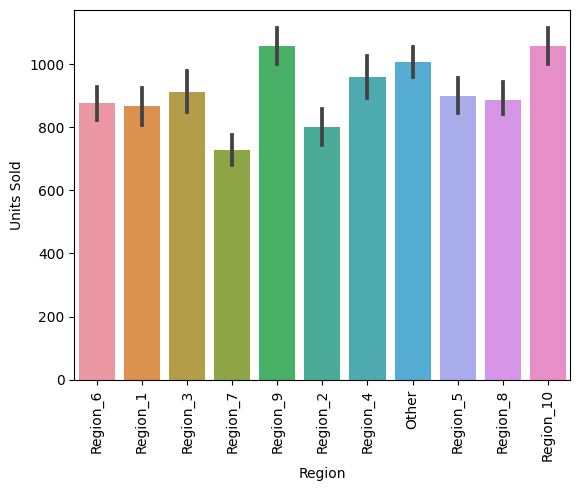

In [137]:
sns.barplot(data = df, x = 'Region', y = 'Units Sold', estimator=np.sum)
plt.xticks(rotation = 90)
plt.show()

Now I take a look at the average price that each region sells its products at. Region 6 sells its products at a much lower average price than any other region. Region 9 sells its products at the highest average price. All other regions sell at a fairly even average price. 

In [138]:
df.groupby('Region')['Price'].median()

Region
Other        76.010
Region_1     76.010
Region_10    76.010
Region_2     80.735
Region_3     76.010
Region_4     76.010
Region_5     76.010
Region_6     59.210
Region_7     76.010
Region_8     76.010
Region_9     86.085
Name: Price, dtype: float64

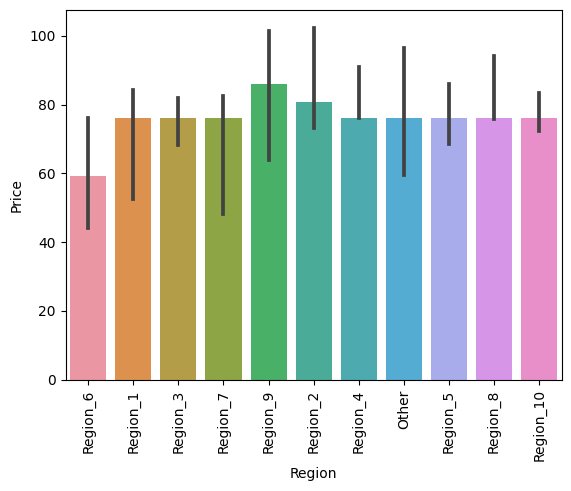

In [139]:
sns.barplot(data = df, x = 'Region', y = 'Price', estimator=np.median)
plt.xticks(rotation = 90)
plt.show()

Then I looked at the combination of units sold and price through the revenue variable and how that was for each of the regions. Region 7s revenue is well below all of the others which is most likely due to that region selling the least amount of products. Region 6 and 3 also have low revenues. Region 6 can be attributed to its low prices and region 3 is low in both units sold and price. Region 2,4,8,9,10 all have high revenues and do not need to be looked at much further as they are clearly doing well. Region 1 and 5 have decent revenues and are not that low in the units sold and price and can be left. 

In [140]:
df.groupby('Region')['Revenue'].sum()

Region
Other        106170.83
Region_1      82644.30
Region_10    100498.37
Region_2      96598.02
Region_3      77641.36
Region_4     100225.02
Region_5      87897.25
Region_6      72756.97
Region_7      63597.38
Region_8     107507.60
Region_9     110772.02
Name: Revenue, dtype: float64

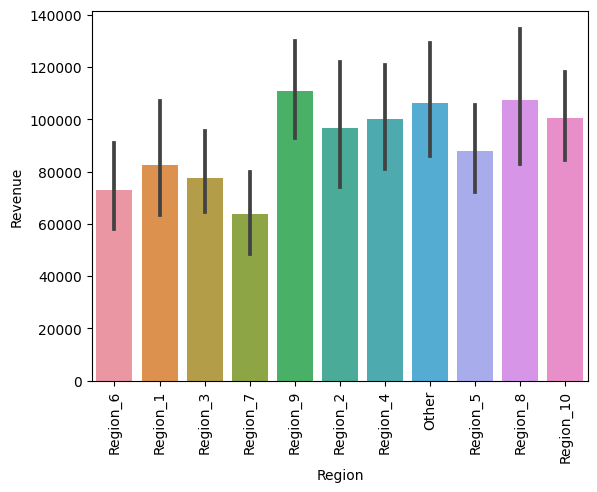

In [141]:
sns.barplot(data = df, x = 'Region', y = 'Revenue', estimator=sum)
plt.xticks(rotation = 90)
plt.show()

You are a data analyst at an e-commerce company that sells a variety of products. Your company wants to better understand how various products perform across regions, in order to devise its sales strategy for next year.

You have been provided with data includes information about the product, the region where the product was sold, the price of the product, the number of units sold, and the date of the sale.

Your task is to clean the data as you see fit, and conduct exploratory analysis which will help the company build a sales strategy for the following year.

In addition to the analysis, be sure to answer the following questions:

1) What conclusions can you draw about sales performance of various products and regions?

2) What recommendations do you have for the business?

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?